<a href="https://colab.research.google.com/github/SamuelJordanTK/Deep-Learning-Practical-Files-B.Tech-AI-DS/blob/main/Samuel_2231173_DeepLearning_Practical1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPERIMENT-1**

## **Aim**  
Implement a basic neural network and analyze its performance.

## **Prerequisites**  
Before proceeding, ensure you have:  
- Basic knowledge of Python programming.  
- Familiarity with libraries such as NumPy, pandas, and Matplotlib.  
- Understanding of key data preprocessing techniques and evaluation metrics (e.g., Mean Squared Error).

## **Experimental Setup**  

### **Software Requirements**  
- Python (version 3.x preferred).  
- Google Colab (or any Python IDE).  
- Required libraries: `numpy`, `matplotlib`.

### **Hardware Requirements**  
- Any standard computer with a working Python environment.  
- No GPU/TPU required since we're using a simple implementation.

## **Theory and Application**  

This experiment focuses on implementing a **feedforward neural network with one hidden layer** for a basic regression task.

### **Neural Network Architecture**  
1. **Input Layer**: Receives the feature vector **X**.  
2. **Hidden Layer**: Applies weights and biases, followed by a **ReLU activation function** for non-linearity.  
3. **Output Layer**: Produces the predicted output **Ŷ**.

### **Mathematical Representation**  
The neural network performs the following computations:

\[
Ŷ = 𝑊_2 * 𝑓 ( 𝑊_1 𝑋 + 𝑏_1 ) + 𝑏_2
\]

Where:  
- \( W_1, W_2 \) are the weight matrices.  
- \( b_1, b_2 \) are the bias terms.  
- \( f(x) \) is the activation function (**ReLU** in this case).  

This simple model demonstrates how neural networks learn by adjusting weights through **backpropagation** to minimize errors.



In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

In [3]:
# Generate synthetic dataset
def generate_data():
    X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
    y = y.reshape(-1, 1)  # Convert y to column vector
    return X, y

In [4]:
# Initialize neural network parameters
def initialize_weights(input_dim, hidden_dim, output_dim):
    np.random.seed(42)
    W1 = np.random.randn(input_dim, hidden_dim) * 0.01
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) * 0.01
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2

In [5]:
# Activation functions and their derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(a):
    return np.where(a > 0, 1, 0)

In [6]:
# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

In [7]:
# Compute loss (Binary Cross-Entropy)
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))
    return loss

In [8]:
# Backpropagation
def backpropagation(X, y, W1, b1, W2, b2, Z1, A1, A2, learning_rate):
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dZ1 = np.dot(dZ2, W2.T) * relu_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

In [9]:
# Training function
def train(X, y, hidden_dim=5, epochs=1000, learning_rate=0.01):
    input_dim = X.shape[1]
    output_dim = 1
    W1, b1, W2, b2 = initialize_weights(input_dim, hidden_dim, output_dim)
    losses = []

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        loss = compute_loss(y, A2)
        losses.append(loss)
        W1, b1, W2, b2 = backpropagation(X, y, W1, b1, W2, b2, Z1, A1, A2, learning_rate)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")

    return W1, b1, W2, b2, losses


In [10]:
# Predict function
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)

In [12]:
X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Train the neural network
W1, b1, W2, b2, losses = train(X_train, y_train, hidden_dim=10, epochs=1000, learning_rate=0.01)

Epoch 0/1000, Loss: 0.6933
Epoch 100/1000, Loss: 0.6932
Epoch 200/1000, Loss: 0.6931
Epoch 300/1000, Loss: 0.6929
Epoch 400/1000, Loss: 0.6928
Epoch 500/1000, Loss: 0.6924
Epoch 600/1000, Loss: 0.6919
Epoch 700/1000, Loss: 0.6909
Epoch 800/1000, Loss: 0.6891
Epoch 900/1000, Loss: 0.6861


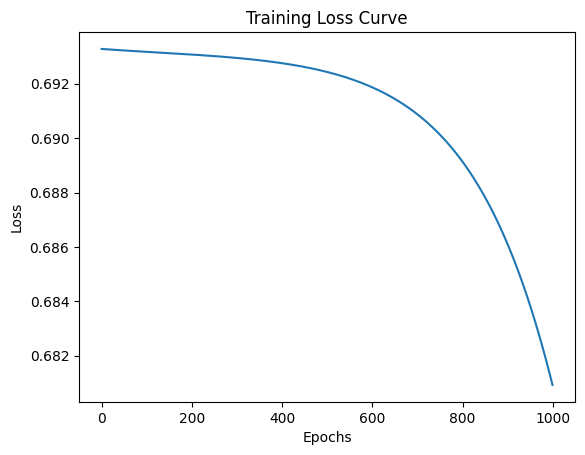

In [14]:
# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

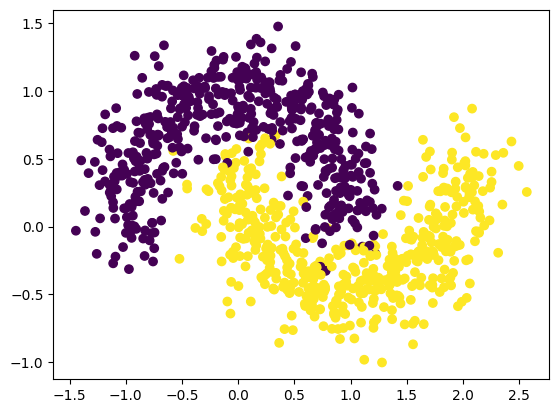

In [16]:
y = y.reshape(-1, 1)
# plot each datapoint using colormap for class 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis');

In [17]:
# Evaluate model
train_predictions = predict(X_train, W1, b1, W2, b2)
test_predictions = predict(X_test, W1, b1, W2, b2)

train_accuracy = np.mean(train_predictions == y_train) * 100
test_accuracy = np.mean(test_predictions == y_test) * 100

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Train Accuracy: 85.88%
Test Accuracy: 82.50%


## Precautions:

* Data Quality: Clean and preprocess data by handling missing values, removing outliers, and scaling features.

* Overfitting: Use cross-validation and regularization techniques to avoid overfitting, especially with small datasets.

* Evaluation Metrics: Employ appropriate metrics like MSE and R-squared to assess model performance and compare predictions with actual values.